In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function to load TSV files with error handling
def load_tsv(file_path):
    try:
        df = pd.read_csv(file_path, sep="\t", header = None, on_bad_lines='skip')  # Skip problematic lines
        print(f"Successfully loaded {file_path} with {df.shape[0]} rows and {df.shape[1]} columns.")
        return df
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

In [3]:
file_actions_27k = "protein.actions.SHS27k.tsv"
file_actions_148k = "protein.actions.SHS148k.tsv"
file_sequences = "protein.sequences.dictionary.both.tsv"

In [4]:
df_actions_27k = pd.read_csv("protein.actions.SHS27k.tsv", sep="\t")

In [9]:
df_sequences = load_tsv("protein.sequences.dictionary.both.tsv")

Successfully loaded protein.sequences.dictionary.both.tsv with 20456 rows and 2 columns.


In [11]:
# Display the first few rows as a table
display(df_actions_27k.head())

item_id_a  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...  9606.ENSP00000000233   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...  9606.ENSP00000000233   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...  9606.ENSP00000000233   
                                                   MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLYY...  9606.ENSP00000000233   
                                                   MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYENA...  9606.ENSP00000000233   

                                                                                                                  item_id_b  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...  9606.ENSP00000250971   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...  9606.ENSP00000250971   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...  9606.ENSP00000019317   
                                                   MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLYY...  9606.ENSP00000216373   
                                                   MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYENA...  9606.ENSP00000012443   

                                                                                                             mode  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...    reaction   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...    reaction   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...  activation   
                                                   MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLYY...    reaction   
                                                   MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYENA...   catalysis   

                                                                                                           action  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...         NaN   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...         NaN   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...  activation   
                                                   MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLYY...         NaN   
                                                   MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYENA...         NaN   

                                                                                                      is_directional  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...              t   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...              t   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...              f   
                                                   MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLYY...              f   
                                                   MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYENA...              t   

                                                                                                      a_is_acting  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...           t   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...           f   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...         

In [13]:
# Rename the columns manually
df_sequences.rename(columns={df_sequences.columns[0]: "Sequence", df_sequences.columns[1]: "item_id"}, inplace=True)

In [15]:
# Display the updated dataframe
display(df_sequences.head())

,Sequence,item_id
0,9606.ENSP00000000233,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...
1,9606.ENSP00000000412,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...
2,9606.ENSP00000000442,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...
3,9606.ENSP00000001008,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...
4,9606.ENSP00000001146,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...


In [17]:
# Reset index to move sequence_a and sequence_b back into columns
df_actions_27k.reset_index(inplace=True)

In [19]:
# Rename the newly created columns
df_actions_27k.rename(columns={"index": "sequence_a", df_actions_27k.columns[1]: "sequence_b"}, inplace=True)

In [21]:
# Display the updated dataframe
display(df_actions_27k.head())

,level_0,sequence_b,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score
0,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,9606.ENSP00000000233,9606.ENSP00000250971,reaction,NaN,t,t,900
1,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,9606.ENSP00000000233,9606.ENSP00000250971,reaction,NaN,t,f,900
2,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGE...,9606.ENSP00000000233,9606.ENSP00000019317,activation,activation,f,f,175
3,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLY...,9606.ENSP00000000233,9606.ENSP00000216373,reaction,NaN,f,f,161
4,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYEN...,9606.ENSP00000000233,9606.ENSP00000012443,catalysis,NaN,t,f,155


In [23]:
# Rename the first two unnamed columns
df_actions_27k.rename(columns={df_actions_27k.columns[0]: "sequence_a"}, inplace=True)

# Display the updated dataframe
display(df_actions_27k.head(20))

,sequence_a,sequence_b,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score
0,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,9606.ENSP00000000233,9606.ENSP00000250971,reaction,NaN,t,t,900
1,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,9606.ENSP00000000233,9606.ENSP00000250971,reaction,NaN,t,f,900
2,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGE...,9606.ENSP00000000233,9606.ENSP00000019317,activation,activation,f,f,175
3,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLY...,9606.ENSP00000000233,9606.ENSP00000216373,reaction,NaN,f,f,161
4,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYEN...,9606.ENSP00000000233,9606.ENSP00000012443,catalysis,NaN,t,f,155
5,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAGSSTGGGGVGETKVIYHLDEEETPYLVKIPVPAERITLGDFKSV...,9606.ENSP00000000233,9606.ENSP00000005340,binding,NaN,f,f,171
6,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,reaction,NaN,t,t,933
7,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,reaction,NaN,t,f,933
8,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,binding,NaN,f,t,933
9,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAGSSTGGGGVGETKVIYHLDEEETPYLVKIPVPAERITLGDFKSV...,9606.ENSP00000000233,9606.ENSP00000005340,binding,NaN,f,t,171


In [25]:
# Rename the first two unnamed columns
df_actions_27k.drop(columns={"action"}, inplace=True)

# Display the updated dataframe
display(df_actions_27k.head(20))

,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
0,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,9606.ENSP00000000233,9606.ENSP00000250971,reaction,t,t,900
1,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,9606.ENSP00000000233,9606.ENSP00000250971,reaction,t,f,900
2,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGE...,9606.ENSP00000000233,9606.ENSP00000019317,activation,f,f,175
3,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLY...,9606.ENSP00000000233,9606.ENSP00000216373,reaction,f,f,161
4,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYEN...,9606.ENSP00000000233,9606.ENSP00000012443,catalysis,t,f,155
5,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAGSSTGGGGVGETKVIYHLDEEETPYLVKIPVPAERITLGDFKSV...,9606.ENSP00000000233,9606.ENSP00000005340,binding,f,f,171
6,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,reaction,t,t,933
7,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,reaction,t,f,933
8,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,binding,f,t,933
9,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAGSSTGGGGVGETKVIYHLDEEETPYLVKIPVPAERITLGDFKSV...,9606.ENSP00000000233,9606.ENSP00000005340,binding,f,t,171


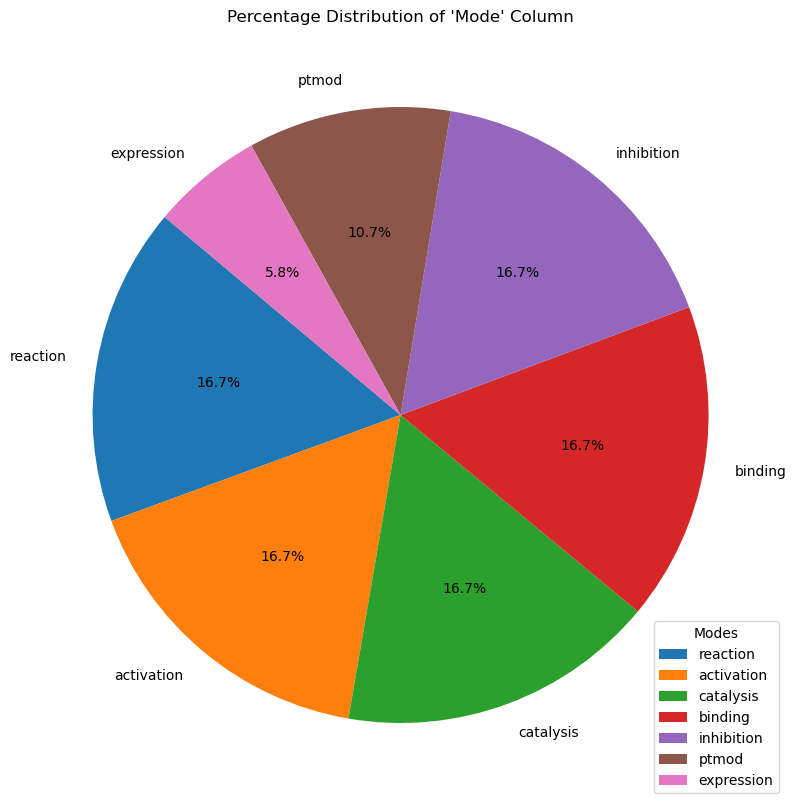

In [27]:
# Create a pie chart for the 'mode' column
plt.figure(figsize=(10, 10))
mode_counts = df_actions_27k['mode'].value_counts()
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentage Distribution of 'Mode' Column")
plt.legend(title="Modes", loc="best")
plt.show()

In [28]:
# Split df_actions_27k into separate dataframes based on 'mode' column
modes = ["reaction", "activation", "catalysis", "binding", "inhibition", "ptmod", "expression"]
df_action_splits = {mode: df_actions_27k[df_actions_27k['mode'] == mode] for mode in modes}

In [31]:
# Display each dataframe before saving
for mode, df_mode in df_action_splits.items():
    print(f"Displaying dataframe for mode: {mode}")
    display(df_mode.head())
    filename = f"df_actions_27k_{mode}.csv"
    df_mode.to_csv(filename, index=False)
    print(f"Saved {filename}")

Displaying dataframe for mode: reaction


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
0,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,9606.ENSP00000000233,9606.ENSP00000250971,reaction,t,t,900
1,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,9606.ENSP00000000233,9606.ENSP00000250971,reaction,t,f,900
3,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLY...,9606.ENSP00000000233,9606.ENSP00000216373,reaction,f,f,161
6,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,reaction,t,t,933
7,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,reaction,t,f,933


Saved df_actions_27k_reaction.csv
Displaying dataframe for mode: activation


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
2,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGE...,9606.ENSP00000000233,9606.ENSP00000019317,activation,f,f,175
29,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTLESMMACCLSDEVKESKRINAEIEKQLRRDKRDARRELKLLLLG...,9606.ENSP00000000233,9606.ENSP00000078429,activation,f,f,152
38,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MFSRRSHGDVKKSTQKVLDPKKDVLTRLKHLRALLDNVDANDLKQF...,9606.ENSP00000000233,9606.ENSP00000202677,activation,f,f,153
41,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSLIRKKGFYKQDVNKTAWELPKTYVSPTHVGSGAYGSVCSAIDKR...,9606.ENSP00000000233,9606.ENSP00000211287,activation,f,f,157
53,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSSPPPARSGFYRQEVTKTAWEVRAVYRDLQPVGSGAYGAVCSAVD...,9606.ENSP00000000233,9606.ENSP00000215659,activation,f,f,157


Saved df_actions_27k_activation.csv
Displaying dataframe for mode: catalysis


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
4,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYEN...,9606.ENSP00000000233,9606.ENSP00000012443,catalysis,t,f,155
12,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,catalysis,t,f,933
13,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,catalysis,t,t,933
14,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLY...,9606.ENSP00000000233,9606.ENSP00000216373,catalysis,t,t,161
16,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MLWLALGPFPAMENQVLVIRIKIPNSGAVDWTVHSGPQLLFRDVLD...,9606.ENSP00000000233,9606.ENSP00000178640,catalysis,t,t,173


Saved df_actions_27k_catalysis.csv
Displaying dataframe for mode: binding


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
5,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAGSSTGGGGVGETKVIYHLDEEETPYLVKIPVPAERITLGDFKSV...,9606.ENSP00000000233,9606.ENSP00000005340,binding,f,f,171
8,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,binding,f,t,933
9,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAGSSTGGGGVGETKVIYHLDEEETPYLVKIPVPAERITLGDFKSV...,9606.ENSP00000000233,9606.ENSP00000005340,binding,f,t,171
10,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MQRPEWPRPHPGEGAAAAGRGPAPPARAGEPSGLRLQEPSLYTIKA...,9606.ENSP00000000233,9606.ENSP00000006101,binding,f,f,933
22,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQGAMRFCSEGDCAISPPRCPRRWLPEGPVPQSPPASMYGSTGSL...,9606.ENSP00000000233,9606.ENSP00000020673,binding,f,f,150


Saved df_actions_27k_binding.csv
Displaying dataframe for mode: inhibition


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
18,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGE...,9606.ENSP00000000233,9606.ENSP00000019317,inhibition,f,t,175
20,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGE...,9606.ENSP00000000233,9606.ENSP00000019317,inhibition,f,f,175
31,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSLIRKKGFYKQDVNKTAWELPKTYVSPTHVGSGAYGSVCSAIDKR...,9606.ENSP00000000233,9606.ENSP00000211287,inhibition,t,t,154
32,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MFSRRSHGDVKKSTQKVLDPKKDVLTRLKHLRALLDNVDANDLKQF...,9606.ENSP00000000233,9606.ENSP00000202677,inhibition,t,f,158
34,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MLWLALGPFPAMENQVLVIRIKIPNSGAVDWTVHSGPQLLFRDVLD...,9606.ENSP00000000233,9606.ENSP00000178640,inhibition,t,t,172


Saved df_actions_27k_inhibition.csv
Displaying dataframe for mode: ptmod


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
15,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSLIRKKGFYKQDVNKTAWELPKTYVSPTHVGSGAYGSVCSAIDKR...,9606.ENSP00000000233,9606.ENSP00000211287,ptmod,f,f,150
61,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSSPPPARSGFYRQEVTKTAWEVRAVYRDLQPVGSGAYGAVCSAVD...,9606.ENSP00000000233,9606.ENSP00000215659,ptmod,f,f,150
73,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,9606.ENSP00000000233,9606.ENSP00000215832,ptmod,f,f,150
136,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,9606.ENSP00000000233,9606.ENSP00000229794,ptmod,f,f,150
219,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MEHIQGAWKTISNGFGFKDAVFDGSSCISPTIVQQFGYQRRASDDG...,9606.ENSP00000000233,9606.ENSP00000251849,ptmod,f,f,157


Saved df_actions_27k_ptmod.csv
Displaying dataframe for mode: expression


,sequence_a,sequence_b,item_id_a,item_id_b,mode,is_directional,a_is_acting,score
456,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...,MNLLDPFMKMTDEQEKGLSGAPSPTMSEDSAGSPCPSGSGSDTENT...,9606.ENSP00000000442,9606.ENSP00000245479,expression,t,t,423
483,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...,MDVLVSECSARLLQQEEEIKSLTAEIDRLKNCGCLGASPNLEQLQE...,9606.ENSP00000001146,9606.ENSP00000231572,expression,t,f,467
550,MLVAGLLLWASLLTGAWPSFPTQDHLPATPRVRLSFKELKATGTAH...,MKAFSPVRSVRKNSLSDHSLGISRSKTPVDDPMSLLYNMNDCYSKL...,9606.ENSP00000002829,9606.ENSP00000234091,expression,t,f,457
566,MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSA...,MSEVEAAAGATAVPAATVPATAAGVVAVVVPVPAGEPQKGGGAGGG...,9606.ENSP00000003084,9606.ENSP00000007699,expression,t,t,433
612,MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSA...,MDMLDPGLDPAASATAAAAASHDKGPEAEEGVELQEGGDGPGAEEQ...,9606.ENSP00000003084,9606.ENSP00000222305,expression,t,f,416


Saved df_actions_27k_expression.csv


In [27]:
df_actions_27k.to_csv("df_actions_27k.csv", index=False)

In [ ]:
# Function to check if a sequence contains 'X'
def contains_unknown_aa(sequence):
    return 'X' in sequence

# Check 'sequence_a' column
unknown_in_sequence_a = df_actions_27k['sequence_a'].apply(contains_unknown_aa).sum()

# Check 'sequence_b' column
unknown_in_sequence_b = df_actions_27k['sequence_b'].apply(contains_unknown_aa).sum()

# Total rows with 'X' in either 'sequence_a' or 'sequence_b'
total_unknown = unknown_in_sequence_a + unknown_in_sequence_b

print(f"Rows with 'X' in 'sequence_a': {unknown_in_sequence_a}")
print(f"Rows with 'X' in 'sequence_b': {unknown_in_sequence_b}")
print(f"Total rows with 'X': {total_unknown}")